In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/lenovo/Desktop/乳腺癌诊断数据集/wisc_bc_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [2]:
data.drop("id",axis = 1,inplace=True)
data['diagnosis'] = data['diagnosis'].replace(['M','B'],[1, 0])

In [7]:
columns_to_drop = ["perimeter_mean", "perimeter_se", "perimeter_worst", "area_mean", "area_se", "area_worst", "compactness_mean", "compactness_se", "compactness_worst", "concave points_mean", "concave points_se", "concave points_worst"]
data_new = data.drop(columns_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  radius_worst             569 non-null    float64
 14  texture_worst            5

In [8]:
data_mean,data_se,data_worst = [],[],[]
for feat in data_new.columns:
    if "mean" in feat:
        data_mean.append(feat)
    elif "se" in feat:
        data_se.append(feat)
    elif "worst" in feat:
        data_worst.append(feat)
print(data_mean)
print(data_se)
print(data_worst)

['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
import math
from sklearn.model_selection import train_test_split # 数据集划分
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.metrics import mean_squared_error, classification_report # 均方误差,精确率和召回率

In [10]:
X = data_new[data_mean]
y = data_new["diagnosis"]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
def confusion_matrix(y_true, y_pred):
    tp = tn = fp = fn = 0
    
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    
    return [[tn, fp], [fn, tp]]

In [12]:
model_1 = GaussianNB()
model_1.fit(train_x,train_y)
y_predict = model_1.predict(test_x)

In [13]:
confusion_matrix(test_y.values, y_predict)

[[64, 3], [5, 42]]

In [14]:
correct = np.count_nonzero((y_predict == test_y) == True)
print(correct/len(test_x))

0.9298245614035088


In [23]:
print(classification_report(test_y, y_predict, labels=[0,1], target_names=["良性", "恶性"]))

              precision    recall  f1-score   support

          良性       0.93      0.96      0.94        67
          恶性       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [18]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_probabilities = None
        self.feature_probabilities = None

    def fit(self, X, y):
        self.classes = list(set(y))
        self.class_probabilities = self.calculate_class_probabilities(y)
        self.feature_probabilities = self.calculate_feature_probabilities(X, y)

    def calculate_class_probabilities(self, y):
        class_counts = {}
        for label in y:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

        total_samples = len(y)
        class_probabilities = {}
        for label, count in class_counts.items():
            class_probabilities[label] = count / total_samples

        return class_probabilities

    def calculate_feature_probabilities(self, X, y):
        feature_probabilities = {}
        for label in self.classes:
            label_indices = [i for i, y_label in enumerate(y) if y_label == label]
            label_features = [X[i] for i in label_indices]
            feature_probabilities[label] = []
            for feature in zip(*label_features):
                mean = sum(feature) / len(feature)
                variance = sum([(x - mean) ** 2 for x in feature]) / len(feature)
                stdev = math.sqrt(variance)
                feature_probabilities[label].append((mean, stdev))

        return feature_probabilities

    def gaussian_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def calculate_probabilities(self, input_data):
        probabilities = {}
        for label in self.classes:
            probabilities[label] = self.class_probabilities[label]
            for i, value in enumerate(input_data):
                mean, stdev = self.feature_probabilities[label][i]
                probabilities[label] *= self.gaussian_probability(value, mean, stdev)

        return probabilities

    def predict(self, X):
        predicted_labels = []
        for input_data in X:
            probabilities = self.calculate_probabilities(input_data)
            predicted_label = max(probabilities, key=probabilities.get)
            predicted_labels.append(predicted_label)
        return predicted_labels

In [19]:
model_2 = NaiveBayes()
model_2.fit(train_x.values, train_y)
y_predict_2 = model_2.predict(test_x.values)

In [20]:
correct = np.count_nonzero((y_predict_2 == test_y) == True)
print(correct/len(test_x))

0.9298245614035088


In [21]:
confusion_matrix(test_y.values, y_predict_2)

[[64, 3], [5, 42]]

In [24]:
print(classification_report(test_y, y_predict_2, labels=[0,1], target_names=["良性", "恶性"]))

              precision    recall  f1-score   support

          良性       0.93      0.96      0.94        67
          恶性       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



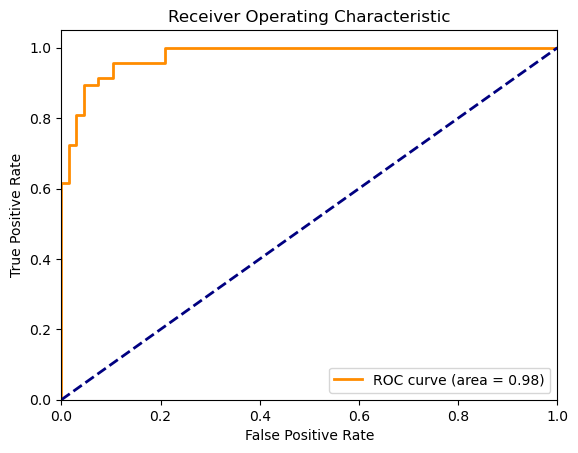

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_proba = model_1.predict_proba(test_x)[:, 1]

# 计算假正率（FPR）和真正率（TPR）
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

# 计算AUC值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()